In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
df = pd.read_csv('IMDB Dataset.csv')
df.head() 

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [63]:
df.dtypes

review       object
sentiment    object
dtype: object

In [64]:
df.isna().any()

review       False
sentiment    False
dtype: bool

In [65]:
"clearly,we have no data as NA"

'clearly,we have no data as NA'

In [66]:
df.shape

(50000, 2)

In [67]:
y_dummies = pd.get_dummies(df['sentiment'], prefix='sentiment').astype(int)
y = y_dummies.values

In [68]:
x = df['review']
y = y_dummies.values

In [69]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x)

# Convert text to sequences
x_sequences = tokenizer.texts_to_sequences(x)
x_padded = pad_sequences(x_sequences, maxlen=200)

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_padded, y, test_size=0.2, random_state=42)


In [71]:
x_train_small = x_train[:500]  
y_train_small = y_train[:500]

In [72]:
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=200),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(y.shape[1], activation='softmax')
])

C:\Users\This PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [73]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
LSTmodel = model.fit(x_train_small, y_train_small, epochs=10, batch_size=64, validation_split=0.2, verbose=1)



Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.6600 - val_loss: 1.0769
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.6600 - val_loss: 1.1441
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.6600 - val_loss: 1.1740
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.6700 - val_loss: 1.1924
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.9981 - loss: 0.0093 - val_accuracy: 0.6400 - val_loss: 1.2905
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.6900 - val_loss: 1.0038
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 0.6600 - val_loss: 0.9559
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.9982 - loss: 0.0093 - val_accuracy: 0.6900 - val_loss:

In [98]:
"clearly seen that training dataset has a high accuracy on 10th epochs i.e 99%."

'clearly seen that training dataset has a high accuracy on 10th epochs i.e 99%.'

In [90]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


In [97]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_labels, y_pred)
print('Test Accuracy:', accuracy)

Test Accuracy: 0.6746


In [99]:
"clearly seen that the accuracy for test dataset is  67%"

'clearly seen that the accuracy for test dataset is  67%'

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_labels,y_pred)
cm

array([[2665, 2296],
       [ 958, 4081]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

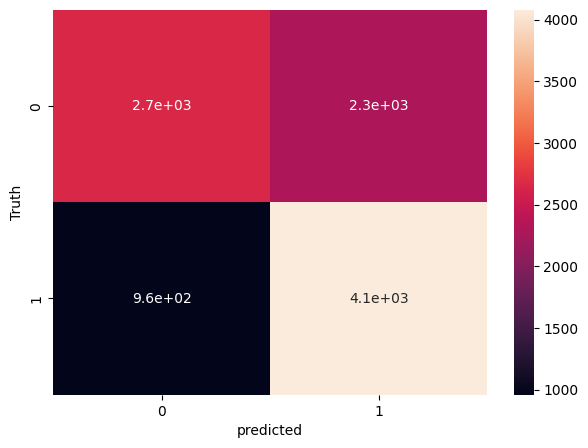

In [92]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')
